# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\61405\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#load_dotenv()

In [ ]:
#pip install python-dotenv

In [ ]:
#!pip install newsapi-python

In [2]:
# Read your api key environment variable
from newsapi import NewsApiClient
load_dotenv()
api_key = os.getenv("newsapi")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [ ]:
#type(newsapi)

In [4]:
# Fetch the Bitcoin news articles
Bitcoin_headlines = newsapi.get_everything(q="bitcoin", 
                                           language="en"
                                          )

# Print total articles
print(f"Total articles about Bitcoin: {Bitcoin_headlines['totalResults']}")

Total articles about Bitcoin: 6643


In [5]:
# Show sample article
Bitcoin_headlines["articles"][0]

{'source': {'id': None, 'name': 'Blogspot.com'},
 'author': 'noreply@blogger.com (Unknown)',
 'title': "Elon Musk reveals who bitcoin's creator Satoshi Nakamoto might be",
 'description': 'Musk.MARK RALSTON/AFP via Getty Images\r\nElon Musk seems to agree with many that hyper-secret cryptocurrency expert Nick Szabo could be Satoshi Nakamoto, the mysterious creator of the digital currency Bitcoin.\xa0"You can watch ideas evolve before Bitcoin was lau…',
 'url': 'https://techncruncher.blogspot.com/2021/12/elon-musk-reveals-who-bitcoins-creator.html',
 'urlToImage': 'https://blogger.googleusercontent.com/img/a/AVvXsEik_48hPzMzsDzwfdUeHj4jNGqYGevEuVjTTPkAGTu9bRN3oePxV6bxF897GK8Az3AaSqUOalYXNG4HSCy0fW5KUHuruCWP8hAfZxgrgbzh-dsbLM9jxyFGCthOZdBCa1dNkqk6mrVl0VtflsV2VvKXfGnwL6-68m-mxp7qHJuLlvqGIahZ9YDe5mt97w=w1200-h630-p-k-no-nu',
 'publishedAt': '2021-12-29T20:41:00Z',
 'content': 'Musk.MARK RALSTON/AFP via Getty Images\r\nElon Musk seems to agree with many that hyper-secret cryptocurrency expe

In [6]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy',
                                     page_size=100)
eth_articles['totalResults']

2967

In [8]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = []
for article in Bitcoin_headlines["articles"]:
    text = article["content"]
    sentiment = analyzer.polarity_scores(text)
    compound = sentiment["compound"]
    positive = sentiment["pos"]
    neutral = sentiment["neu"]
    negative = sentiment["neg"]
    dictionary = {"Compound": compound, "Negative": negative, "Neutral": neutral, "Positive": positive, "text": text}
    btc_sentiment.append(dictionary)     
btc_df = pd.DataFrame(btc_sentiment)
btc_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.3612,0.000,0.923,0.077,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...
1,0.0000,0.000,1.000,0.000,When Denis Rusinovich set up cryptocurrency mi...
2,-0.4404,0.083,0.917,0.000,Block founder Jack Dorsey has announced on Twi...
3,0.6369,0.000,0.852,0.148,A cryptocurrency CEO has become one of the ric...
4,0.5859,0.000,0.858,0.142,Dec 23 (Reuters) - The U.S. Securities and Exc...


In [9]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment = []
for article in eth_articles["articles"]:
    text = article["content"]
    sentiment = analyzer.polarity_scores(text)
    compound = sentiment["compound"]
    positive = sentiment["pos"]
    neutral = sentiment["neu"]
    negative = sentiment["neg"]
    dictionary = {"Compound": compound, "Negative": negative, "Neutral": neutral, "Positive": positive, "text": text}
    eth_sentiment.append(dictionary)     
eth_df = pd.DataFrame(eth_sentiment)
eth_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.1531,0.06,0.940,0.000,"Crypto Street Restaurant, Clearwater Beach, Fl..."
1,0.7579,0.00,0.783,0.217,Investors interest and growing cryptocurrency ...
2,0.0000,0.00,1.000,0.000,CryptoPunksRokas Tenys\r\n<ul><li>NFT sales ha...
3,0.0000,0.00,1.000,0.000,"Representations of cryptocurrencies Bitcoin, E..."
4,0.0000,0.00,1.000,0.000,"In early December 2021, Skiff rolled out the o..."


In [10]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.00000,20.000000
mean,0.032865,0.043000,0.90150,0.055500
std,0.419648,0.069119,0.09483,0.065588
min,-0.862200,0.000000,0.66500,0.000000
25%,-0.124250,0.000000,0.84775,0.000000
50%,0.000000,0.000000,0.92000,0.031500
75%,0.366350,0.074750,1.00000,0.088500
max,0.790600,0.266000,1.00000,0.211000


In [11]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.00000,100.00000,100.000000
mean,0.215855,0.03068,0.88360,0.085730
std,0.434824,0.05011,0.09338,0.090614
min,-0.802000,0.00000,0.62800,0.000000
25%,0.000000,0.00000,0.81375,0.000000
50%,0.190100,0.00000,0.90250,0.073500
75%,0.579975,0.06175,0.95100,0.151000
max,0.946000,0.24600,1.00000,0.372000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean positive score of 85%

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()


In [14]:
#article = reuters.raw(fileids=reuters.fileids(categories='cpi')[2])
print(article)

{'source': {'id': 'business-insider', 'name': 'Business Insider'}, 'author': 'insider@insider.com (Simon Chandler)', 'title': 'Proof of work is at the core of the system that manages Bitcoin transactions and secures the network', 'description': 'Proof of work is the algorithm underlying Bitcoin and other cryptocurrency networks that keeps them secure.', 'url': 'https://www.businessinsider.com/personal-finance/proof-of-work', 'urlToImage': 'https://i.insider.com/61ba298347814c00190cf102?width=1200&format=jpeg', 'publishedAt': '2021-12-16T22:46:27Z', 'content': "Bitcoin's most notable feature is its decentralization. It operates securely without the involvement of a central authority. A distributed network of users store and update the digital ledger that re… [+8967 chars]"}


In [15]:
# Create a list of stopwords
def process_text(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output



In [31]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    words = [t.translate(str.maketrans('','',string.punctuation)) for t in tokens]

   
    # Create a tokenized list of the words
    tokens = word_tokenize(re_clean)
    
    
    # Lemmatize words into root words
    tokens = ', '.join([lemmatizer.lemmatize(word) for word in words])

   
    # Convert the words to lowercase
    tokens = [t.lower() for t in tokens]
    
    # Remove the stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    return tokens

In [33]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_df["tokens"]= btc_df['text'].apply(tokenizer)
btc_df.head()

In [ ]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_df["tokens"] = eth_df['text'].apply(tokenizer)
eth_df.head()

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [ ]:
# Generate the Bitcoin N-grams where N=2
bitcoin_p = tokenizer(Bitcoin_df.text.str.cat())
bitcoin_p

In [ ]:
# Generate the Ethereum N-grams where N=2
ethereum_p= tokenizer(eth_df.text.str.cat())
ethereum_p

In [ ]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [ ]:
# Use token_count to get the top 10 words for Bitcoin
N=2
bigram_counts_B = Counter(ngrams(bitcoin_p, N))
print(dict(bigram_counts_B))

In [ ]:
# Use token_count to get the top 10 words for Ethereum
N= 2
bigram_counts_E = Counter(ngrams(ethereum_p, N))
print(dict(bigram_counts_E))

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [ ]:
#!pip install wordcloud

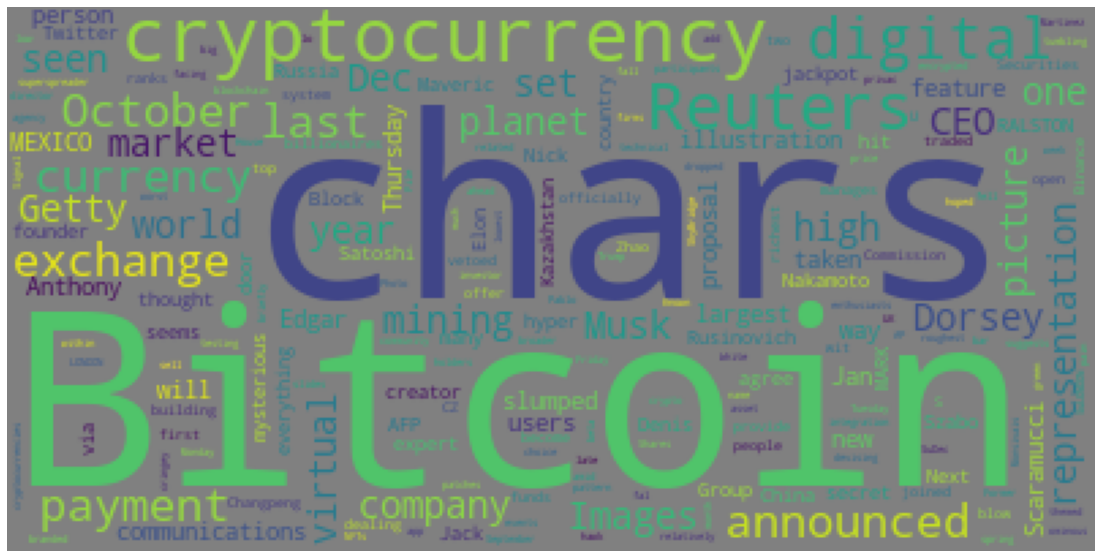

In [18]:
# Generate the Bitcoin word cloud
cloud1 = WordCloud(background_color='grey').generate(btc_df.text.str.cat())
cloud1
plt.axis("off")
plt.imshow(cloud1)

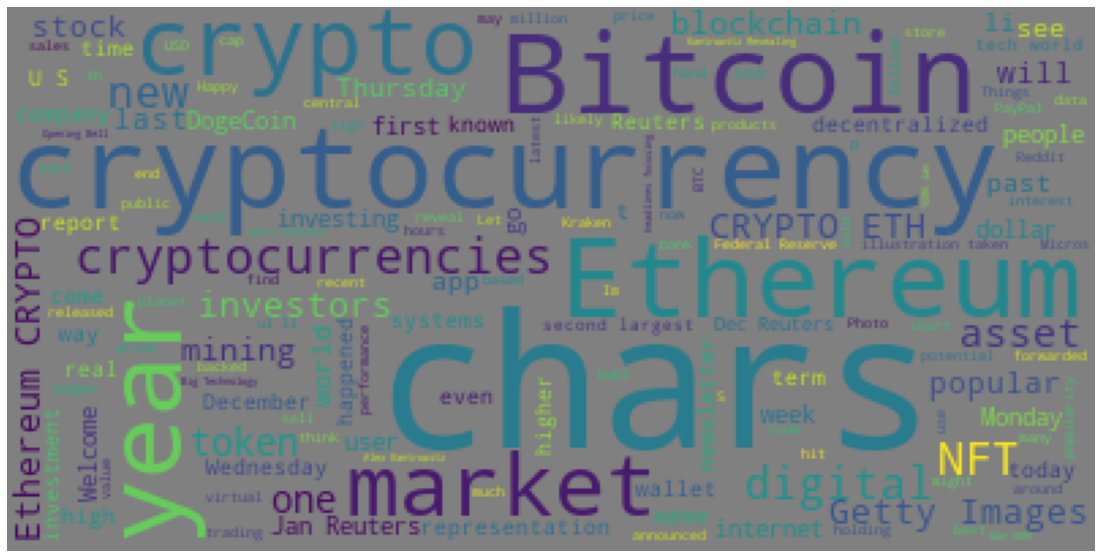

In [19]:
# Generate the Ethereum word cloud
cloud2 = WordCloud(background_color='grey').generate(eth_df.text.str.cat())
cloud2
plt.axis("off")
plt.imshow(cloud2)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [20]:
import spacy
from spacy import displacy

In [ ]:
#!pip install spacy

In [21]:
# Download the language model for Spacy
#!python -m spacy download en_core_web_sm


In [22]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [23]:
# Concatenate all of the Bitcoin text together
all_concat_bitcoin = btc_df.text.str.cat()
all_concat_bitcoin

'Musk.MARK RALSTON/AFP via Getty Images\r\nElon Musk seems to agree with many that hyper-secret cryptocurrency expert Nick Szabo could be Satoshi Nakamoto, the mysterious creator of the digital currency… [+1467 chars]When Denis Rusinovich set up cryptocurrency mining company Maveric Group in Kazakhstan in 2017, he thought he had hit the jackpot. Next door to China and Russia, the country had everything a Bitcoin … [+4140 chars]Block founder Jack Dorsey has announced on Twitter that the company is officially building an open bitcoin mining system. Dorsey first announced in October last year that the digital payments provide… [+1584 chars]A cryptocurrency CEO has become one of the richest people on the planet.Changpeng "CZ" Zhao, who manages the Binance cryptocurrency exchange, has joined the ranks of the world\'s top billionaires, wit… [+3566 chars]Dec 23 (Reuters) - The U.S. Securities and Exchange Commission vetoed two proposals to offer bitcoin exchange-traded funds, dealing a blow t

In [24]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(all_concat_bitcoin)
bitcoin_doc

# Add a title to the document
bitcoin_doc.user_data["Title"] = "Bitcoin NER"

In [25]:
# Render the visualization
displacy.render(bitcoin_doc, style = 'ent')

In [26]:
# List all Entities
for i in bitcoin_doc.ents:
    print(i.text, i.label_)

Getty Images ORG
Elon Musk PERSON
Nick Szabo PERSON
Satoshi Nakamoto PERSON
Denis Rusinovich PERSON
Maveric Group ORG
Kazakhstan GPE
2017 DATE
China GPE
Russia GPE
Jack Dorsey PERSON
Twitter PRODUCT
first ORDINAL
October last year DATE
Changpeng PERSON
Binance PERSON
23 CARDINAL
Reuters ORG
The U.S. Securities and Exchange Commission ORG
two CARDINAL
this week DATE
Bitcoin PERSON
October 19, 2021 DATE
REUTERS ORG
Reuters ORG
6.13% PERCENT
47,606.92 MONEY
Tuesday DATE
Jan 7 DATE
Reuters ORG
Friday DATE
as much as 5% PERCENT
late September DATE
41,000 MONEY
3.7% PERCENT
Bitcoin PERSON
October 19, 2021 DATE
REUTERS ORG
Jan 10 DATE
Reuters ORG
over 5% PERCENT
Monday DATE
40,000 MONEY
5-month DATE
2.6% PERCENT
40,800 MONEY
the spring of 2021 DATE
Signal ORG
UK GPE
Trump White House ORG
Anthony Scaramucci PERSON
AP Photo/Pablo Martinez Monsivais ORG
File ORG
SkyBridge Capital ORG
Anthony Scaramucci PERSON
Kitco News' ORG
2022 DATE
The new year DATE
the Federal Reserve ORG
Wednesday DATE
Thur

---

### Ethereum NER

In [27]:
# Concatenate all of the Ethereum text together
all_concat_ethereum = eth_df.text.str.cat()
all_concat_ethereum

'Crypto Street Restaurant, Clearwater Beach, Florida.@ClwBeachCrypto/Twitter\r\nA new restaurant in Clearwater Beach, Florida wants more customers to partake in the crypto craze.\r\nCrypto Street Restaura… [+2203 chars]Investors interest and growing cryptocurrency uptake helped Ethereum surge 418% in 2021. However, meme stocks AMC Entertainment (AMC) and GameStop (GME) beat Ethereums returns, soaring more than 650%… [+3683 chars]CryptoPunksRokas Tenys\r\n<ul><li>NFT sales have had a breakthrough year, with total sales volume surging to $14 billion in 2021.</li><li>The NFT market is dominated by a handful of standout leaders du… [+2769 chars]Representations of cryptocurrencies Bitcoin, Ethereum, DogeCoin, Ripple, Litecoin are placed on PC motherboard in this illustration taken, June 29, 2021. REUTERS/Dado Ruvic/File Photo\r\nDUBAI, Dec 20 … [+337 chars]In early December 2021, Skiff rolled out the option to log in with your MetaMask wallet - letting users access end-to-end encrypted docu

In [28]:
# Run the NER processor on all of the text
ethereum_doc = nlp(all_concat_ethereum)
ethereum_doc

# Add a title to the document
ethereum_doc.user_data["Title"] = "Ethereum NER"

In [29]:
# Render the visualization
displacy.render(ethereum_doc, style = 'ent')

In [30]:
# List all Entities
for i in ethereum_doc.ents:
    print(i.text, i.label_)

Crypto Street Restaurant ORG
Clearwater Beach GPE
Florida.@ClwBeachCrypto/Twitter ORG
Clearwater Beach GPE
Florida GPE
Crypto Street Restaura PERSON
Ethereum GPE
418% PERCENT
2021 DATE
AMC Entertainment ORG
AMC ORG
GME ORG
Ethereums ORG
more than 650% PERCENT
Tenys ORG
a breakthrough year DATE
$14 billion MONEY
2021.</li><li CARDINAL
NFT ORG
Bitcoin, Ethereum ORG
DogeCoin ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/File Photo PERSON
DUBAI ORG
early December 2021 DATE
Skiff ORG
MetaMask PRODUCT
Skiff ORG
Bitcoin, Ethereum ORG
DogeCoin ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration PERSON
MOSCOW GPE
Jan DATE
Bitcoin PERSON
October 19, 2021 DATE
REUTERS ORG
Reuters ORG
6.13% PERCENT
47,606.92 MONEY
Tuesday DATE
Getty Images ORG
Cryptocurrencies ORG
Wednesday DATE
50,000 MONEY
Changpeng PERSON
Binance PERSON
Images ORG
a banner year DATE
2021 DATE
the new year DATE
Crypto PERSON
2021 DATE
chars]NurPhoto/Getty Images ORG
Robinhood ORG
Thursday DATE
seven CARDINAL
Ethereum ORG


---